In [325]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor


Data Cleaning

In [326]:
files = ['/content/sample_data/hyderabad_first_type_000.csv', '/content/sample_data/hyderabad_first_type_100.csv', '/content/sample_data/hyderabad_first_type_200.csv','/content/sample_data/hyderabad_first_type_300.csv']
df_list = [pd.read_csv(f) for f in files]


In [327]:
df = pd.concat(df_list, ignore_index=True)

In [328]:
df.shape

(9866, 13)

In [329]:
df.isnull().sum()

Price                0
Carpet Area       8036
Bedrooms            32
Builder           9590
Paid User            0
Locality           665
Property Type        0
User Type            0
Prime Location       0
Agent                1
Link                 0
Prop ID              0
Other                0
dtype: int64

In [330]:
df['Locality'].dropna(inplace=True)


In [331]:
df.sample(10)

,Price,Carpet Area,Bedrooms,Builder,Paid User,Locality,Property Type,User Type,Prime Location,Agent,Link,Prop ID,Other
2516,1.40 Cr,NaN,3,NaN,N,"Nallagandla, Serilingampally",Apartment,Owner,Y,Dr Imran Sharieff,https://www.magicbricks.com/propertyDetails/3-...,domcache_srp_56101637,***super area*1560 sqft****status*Ready to Mov...
5269,52 Lac,NaN,2,NaN,N,Madhura Nagar-Nizampet,Apartment,Owner,Y,Pavithra u,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55388965,***carpet area*1150 sqft****status*Ready to Mo...
9373,35 Lac,NaN,2,NaN,N,"Vanasthalipuram, NH 9",Apartment,Owner,Y,Bhaskar,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55192929,***super area*1000 sqft****status*Ready to Mov...
931,35 Lac,NaN,2,NaN,N,Bachupally,Apartment,Owner,Y,kvssprasad,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55800289,***carpet area*950 sqft****status*Ready to Mov...
7545,94 Lac,NaN,3,NaN,N,Gachibowli,Apartment,Owner,Y,gv Krishna,https://www.magicbricks.com/propertyDetails/3-...,domcache_srp_55510549,***carpet area*1756 sqft****status*Ready to Mo...
417,44.5 Lac,NaN,2,NaN,Y,"Bowrampet, Outer Ring Road",Apartment,Owner,Y,Venkat,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_50601728,***carpet area*900 sqft****status*Ready to Mov...
9170,55 Lac,N,3,NaN,N,"Kings Colony, Nawab Saheb Kunta",Apartment,Owner,Y,Mr Abdul,https://www.magicbricks.com/propertyDetails/3-...,domcache_srp_53801699,***super area*1800 sqft*****floor*2 out of 6 f...
9792,25 Lac,NaN,1,NaN,N,"Moosapet, NH 9",Apartment,Owner,Y,Pradeep Mishra,https://www.magicbricks.com/propertyDetails/1-...,domcache_srp_53995501,***carpet area*630 sqft****status*Ready to Mov...
3544,67 Lac,NaN,2,NaN,N,"Abids, NH 7",Apartment,Owner,Y,Keshav Rao,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_37329865,***super area*1340 sqft****status*Ready to Mov...
2630,1.30 Cr,NaN,8,NaN,N,Dabeerpura,Residential House,Owner,Y,Pranay,https://www.magicbricks.com/propertyDetails/8-...,domcache_srp_42442331,***carpet area*3500 sqft****status*Ready to Mo...


In [332]:
df.drop(columns=['Carpet Area','Agent','Builder','Paid User','User Type','Prime Location','Prop ID'], inplace=True)

In [333]:
df.head()

,Price,Bedrooms,Locality,Property Type,Link,Other
0,49.3 Lac,2,Adibatla,Apartment,https://www.magicbricks.com/propertyDetails/2-...,***super area*1285 sqft*****transaction*New Pr...
1,79.9 Lac,2,"Manikonda, Outer Ring Road",Apartment,https://www.magicbricks.com/propertyDetails/2-...,***super area*1268 sqft****status*Ready to Mov...
2,86.3 Lac,2,Hitech City,Apartment,https://www.magicbricks.com/propertyDetails/2-...,***super area*1150 sqft****status*Ready to Mov...
3,40.9 Lac,2,Aminpur,Apartment,https://www.magicbricks.com/propertyDetails/2-...,***super area*918 sqft****status**\t\t\t\t\t\t...
4,1.35 Cr,3,Shaikpet,Apartment,https://www.magicbricks.com/propertyDetails/3-...,***super area*1895 sqft****status**\t\t\t\t\t\...


In [334]:
df['Other'][0]

'***super area*1285\xa0sqft*****transaction*New Property***furnishing*Unfurnished***car parking*1 Covered***bathroom*2**'

In [335]:
df['Link'][0]

'https://www.magicbricks.com/propertyDetails/2-BHK-1285-Sq-ft-Multistorey-Apartment-FOR-Sale-Adibatla-in-Hyderabad&id=4d423534333634343537?sem=Y&semsrc=CPLADS_1_PDP_Existing_Web&slot=1'

In [336]:
df.drop(columns=['Other'], inplace=True)

In [337]:
pattern = r'(\d+)-Sq-ft'
df['Sqft'] = df['Link'].str.extract(pattern)


In [338]:
df.sample()

,Price,Bedrooms,Locality,Property Type,Link,Sqft
6655,45 Lac,2,Prasanth Nagar,Apartment,https://www.magicbricks.com/propertyDetails/2-...,746


In [339]:
df.drop(columns=['Link'], inplace=True)

In [340]:
len(df['Locality'].unique())

1039

In [341]:
(df['Locality'].value_counts()>10).sum()

155

In [342]:
(df['Price'].value_counts()==1).sum()

236

In [343]:
pattern = r'(\d+)'
df['Price'] = df['Price'].str.extract(pattern)
df.head()


,Price,Bedrooms,Locality,Property Type,Sqft
0,49,2,Adibatla,Apartment,1285
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268
2,86,2,Hitech City,Apartment,1150
3,40,2,Aminpur,Apartment,918
4,1,3,Shaikpet,Apartment,1895


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866 entries, 0 to 9865
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          9866 non-null   object
 1   Bedrooms       9834 non-null   object
 2   Locality       9201 non-null   object
 3   Property Type  9866 non-null   object
 4   Sqft           8991 non-null   object
dtypes: object(5)
memory usage: 385.5+ KB


In [345]:
df['Bedrooms'][2193]

'> 10'

In [346]:
df['Price']=pd.to_numeric(df['Price'], errors= 'coerce')
df['Sqft']=pd.to_numeric(df['Sqft'],errors= 'coerce')



In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866 entries, 0 to 9865
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          9866 non-null   int64  
 1   Bedrooms       9834 non-null   object 
 2   Locality       9201 non-null   object 
 3   Property Type  9866 non-null   object 
 4   Sqft           8991 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 385.5+ KB


In [348]:
df.sample(5)

,Price,Bedrooms,Locality,Property Type,Sqft
4144,1,3,"Kukatpally, NH 9",Apartment,1600.0
5165,45,3,"Upparpally, Hyderabad Expressway",Builder Floor Apartment,1200.0
22,1,3,Kompally,Villa,1833.0
3563,50,3,"Miyapur, NH 9",Apartment,1000.0
1567,92,3,"Gopalnagar Society, Hafeezpet",Apartment,1550.0


In [349]:
df.loc[df['Price'] == 1, 'Price'] = 100


In [350]:
(df['Price'].value_counts()==1).sum()

0

In [351]:
(df['Price']==100).sum()

1707

In [352]:
df.head()

,Price,Bedrooms,Locality,Property Type,Sqft
0,49,2,Adibatla,Apartment,1285.0
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268.0
2,86,2,Hitech City,Apartment,1150.0
3,40,2,Aminpur,Apartment,918.0
4,100,3,Shaikpet,Apartment,1895.0


In [353]:
df.isnull().sum()

Price              0
Bedrooms          32
Locality         665
Property Type      0
Sqft             875
dtype: int64

In [354]:
df.dropna(inplace=True)

In [355]:
df.isnull().sum()

Price            0
Bedrooms         0
Locality         0
Property Type    0
Sqft             0
dtype: int64

In [356]:
df.shape

(8363, 5)

In [357]:
df['Locality'].value_counts()

Locality
Miyapur, NH  9                         263
Manikonda, Outer Ring Road             228
Bachupally                             219
Nizampet                               207
Kondapur                               190
                                      ... 
Venkataramana Colony, Secunderabad       1
Saraswathi Colony, Secunderabad          1
Muthawalliguda                           1
Kurmaguda, Srisailam Highway             1
Beerappagadda, Secunderabad, NH 2 2      1
Name: count, Length: 966, dtype: int64

In [358]:
len(df['Locality'].unique())

966

In [359]:
p = df[df['Locality'].isin(df['Locality'].value_counts()[df['Locality'].value_counts() > 50].index)]


In [360]:
p

,Price,Bedrooms,Locality,Property Type,Sqft
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268.0
3,40,2,Aminpur,Apartment,918.0
6,77,2,"LB Nagar, NH 9",Apartment,1250.0
7,52,2,"Tellapur, Outer Ring Road",Apartment,1010.0
8,72,2,Kompally,Apartment,1249.0
...,...,...,...,...,...
9834,54,2,"Manikonda, Outer Ring Road",Builder Floor Apartment,1250.0
9847,33,2,Bachupally,Apartment,1055.0
9857,40,2,Nizampet,Apartment,1115.0
9860,52,3,"Manikonda, Outer Ring Road",Apartment,1125.0


In [361]:
(df['Locality'].value_counts()>50).sum()

36

In [362]:
len(p['Locality'].unique())

36

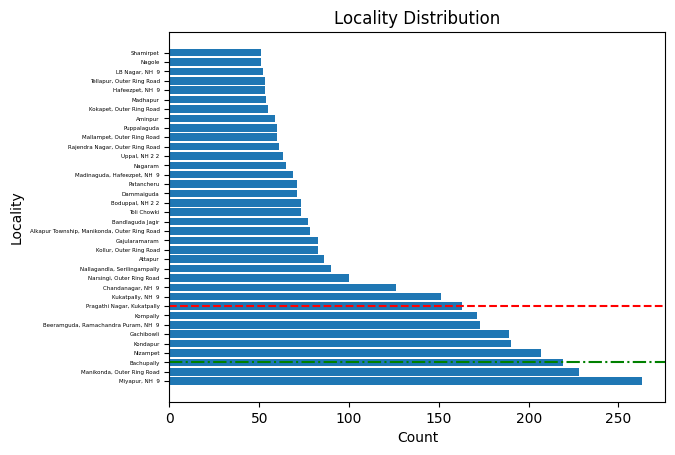

In [363]:
locality_counts = df['Locality'].value_counts()
filtered_counts = locality_counts[locality_counts > 50]
new_loc = df[df['Locality'].isin(filtered_counts.index)]
plt.barh(new_loc['Locality'].value_counts().index,new_loc['Locality'].value_counts().values)
plt.yticks(fontsize=4)

plt.xlabel('Count')
plt.ylabel('Locality')
plt.title('Locality Distribution')
mean_value = int(locality_counts.mean())
median_value = int(locality_counts.median())

plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean')
plt.axhline(y=median_value, color='green', linestyle='-.', label='Median')

plt.show()


In [364]:
df.head()

,Price,Bedrooms,Locality,Property Type,Sqft
0,49,2,Adibatla,Apartment,1285.0
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268.0
2,86,2,Hitech City,Apartment,1150.0
3,40,2,Aminpur,Apartment,918.0
4,100,3,Shaikpet,Apartment,1895.0


In [365]:
#locality_counts.median()


In [366]:
df.sample()

,Price,Bedrooms,Locality,Property Type,Sqft
966,60,2,Moti Nagar,Apartment,850.0


In [367]:
df = df[df['Locality'].isin(p['Locality'])]
df

,Price,Bedrooms,Locality,Property Type,Sqft
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268.0
3,40,2,Aminpur,Apartment,918.0
6,77,2,"LB Nagar, NH 9",Apartment,1250.0
7,52,2,"Tellapur, Outer Ring Road",Apartment,1010.0
8,72,2,Kompally,Apartment,1249.0
...,...,...,...,...,...
9834,54,2,"Manikonda, Outer Ring Road",Builder Floor Apartment,1250.0
9847,33,2,Bachupally,Apartment,1055.0
9857,40,2,Nizampet,Apartment,1115.0
9860,52,3,"Manikonda, Outer Ring Road",Apartment,1125.0


In [368]:
df.head()

,Price,Bedrooms,Locality,Property Type,Sqft
1,79,2,"Manikonda, Outer Ring Road",Apartment,1268.0
3,40,2,Aminpur,Apartment,918.0
6,77,2,"LB Nagar, NH 9",Apartment,1250.0
7,52,2,"Tellapur, Outer Ring Road",Apartment,1010.0
8,72,2,Kompally,Apartment,1249.0


In [369]:
len(df['Locality'].unique())

36

Data Preprocessing

In [370]:
l = sklearn.preprocessing.LabelEncoder()
df['Locality'] = l.fit_transform(df['Locality'])

<ipython-input-370-c7d124332d37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Locality'] = l.fit_transform(df['Locality'])


In [371]:
df['Property Type'].unique()

array(['Apartment', 'Villa', 'Residential House',
       'Builder Floor Apartment', 'Penthouse'], dtype=object)

In [372]:
df['Bedrooms'].unique()

array(['2', '3', '4', '1', '6', '5', '> 10', '7'], dtype=object)

In [373]:
(df['Bedrooms']=='> 10').sum()

1

In [374]:
df.drop(df[df['Bedrooms'] == '> 10'].index, inplace=True)


<ipython-input-374-fbc073e842e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Bedrooms'] == '> 10'].index, inplace=True)


In [375]:
(df['Bedrooms']=='> 10').sum()

0

In [376]:
len(df['Locality'].unique())


36

In [377]:
df.sample(5)

,Price,Bedrooms,Locality,Property Type,Sqft
4214,54,2,3,Builder Floor Apartment,1335.0
6029,26,1,3,Residential House,100.0
1836,49,2,23,Apartment,1010.0
1283,59,2,19,Apartment,1025.0
4742,72,2,18,Apartment,1245.0


In [378]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Price','Bedrooms','Property Type'], axis=1), df['Price'], test_size=0.2, random_state=42)

In [379]:
x_train.head()

,Locality,Sqft
9210,19,1340.0
8988,29,1080.0
1336,3,1449.0
9691,5,900.0
5523,7,1600.0


Random Forest

In [380]:
mr = RandomForestRegressor(max_features=1, criterion='squared_error')
mr.fit(x_train, y_train)

RandomForestRegressor(max_features=1)

In [381]:
y_pred = mr.predict(x_test)

In [382]:
from sklearn.metrics import mean_squared_error, r2_score

In [383]:
r2_score(y_test, y_pred)

0.6681252613905783

In [384]:
mean_squared_error(y_test, y_pred)

190.19350876911045

ANN

In [425]:
mn = Sequential()

In [386]:
x_train.shape[1]

2

In [412]:
from tensorflow.keras.regularizers import l2


In [426]:
mn.add(Dense(30, activation='relu', input_shape=(x_train.shape[1],),kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)))
mn.add(Dense(20, activation='relu',kernel_regularizer=l2(0.001)))
mn.add(Dense(10, activation='relu'))
# mn.add(Dropout(0.02))

# mn.add(Dense(10, activation='relu'))
mn.add(Dense(1, activation='linear'))

In [427]:
mn.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 30)                90        
                                                                 
 dense_105 (Dense)           (None, 20)                620       
                                                                 
 dense_106 (Dense)           (None, 10)                210       
                                                                 
 dense_107 (Dense)           (None, 1)                 11        
                                                                 
Total params: 931 (3.64 KB)
Trainable params: 931 (3.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [428]:
mn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    # optimizer='adam',
    loss='mean_squared_error',
)


In [429]:
hist = mn.fit(x_train,y_train, epochs=100,validation_split=0.2,batch_size=None)

Epoch 1/100
76/76 [==============================] - 2s 9ms/step - loss: 3308.6726 - val_loss: 306.2146
Epoch 2/100
76/76 [==============================] - 0s 6ms/step - loss: 358.8955 - val_loss: 306.6190
Epoch 3/100
76/76 [==============================] - 0s 6ms/step - loss: 354.5712 - val_loss: 310.6520
Epoch 4/100
76/76 [==============================] - 0s 6ms/step - loss: 353.8047 - val_loss: 308.3396
Epoch 5/100
76/76 [==============================] - 0s 4ms/step - loss: 353.0580 - val_loss: 306.6528
Epoch 6/100
76/76 [==============================] - 0s 4ms/step - loss: 353.5114 - val_loss: 308.7572
Epoch 7/100
76/76 [==============================] - 0s 5ms/step - loss: 354.9077 - val_loss: 306.3193
Epoch 8/100
76/76 [==============================] - 0s 4ms/step - loss: 353.9187 - val_loss: 305.4346
Epoch 9/100
76/76 [==============================] - 0s 4ms/step - loss: 352.9249 - val_loss: 307.9561
Epoch 10/100
76/76 [==============================] - 0s 4ms/step - loss

In [ ]:
hist.history

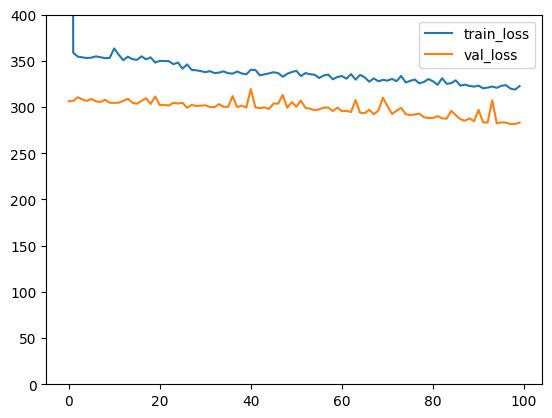

In [432]:
import matplotlib.pyplot as mp
mp.plot(hist.history['loss'])
mp.plot(hist.history['val_loss'])
mp.legend(labels=['train_loss','val_loss'])
mp.ylim(0,400)
mp.show()

In [433]:
y_pred = mn.predict(x_test)

24/24 [==============================] - 0s 2ms/step


In [434]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4652962422755218

In [435]:
mn.evaluate(
    x=x_test,
    y=y_test,
    batch_size=None,
    verbose="auto",
    sample_weight=None,
    steps=None,
    callbacks=None,
    return_dict=False,
 )


24/24 [==============================] - 0s 2ms/step - loss: 306.4488


306.4488220214844

In [436]:
mn.get_config()


{'name': 'sequential_18',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_104_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_104',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 2),
    'units': 30,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'RandomNormal',
     'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_n

In [437]:
mn.optimizer.get_config()


{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}